In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

#### Carga dos Dados

In [3]:
df_pontuacao = pd.read_csv('./datasets/pontuacao_teste.csv')

In [4]:
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [5]:
df_pontuacao.head(10)

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85
5,5.0,100
6,5.5,115
7,6.1,120
8,6.5,130
9,7.2,145


### EDA

In [6]:
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

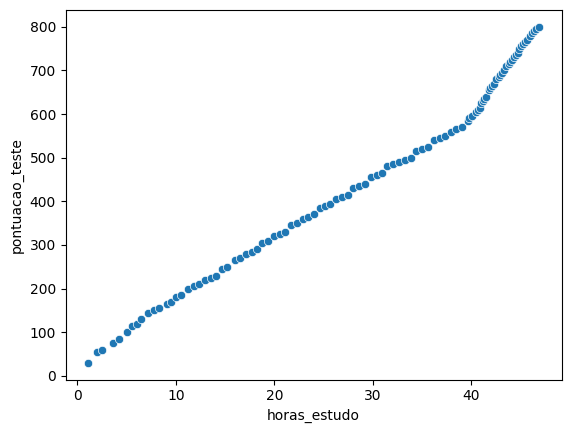

In [7]:
sns.scatterplot(x='horas_estudo', y='pontuacao_teste', data=df_pontuacao)

<Axes: ylabel='horas_estudo'>

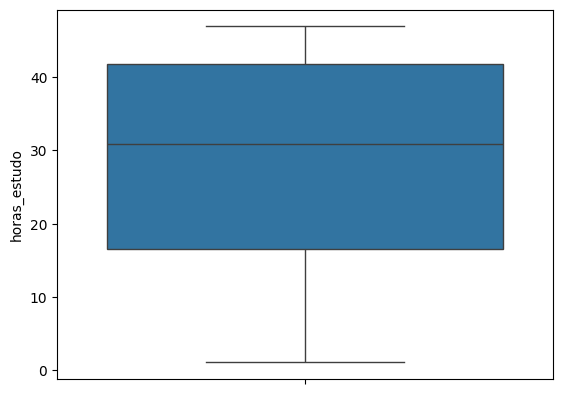

In [8]:
# Outliers
sns.boxplot(y='horas_estudo', data=df_pontuacao)

<Axes: ylabel='pontuacao_teste'>

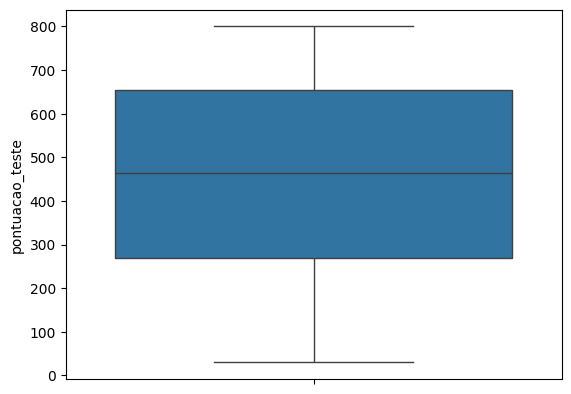

In [9]:
sns.boxplot(y='pontuacao_teste', data=df_pontuacao)

<Axes: >

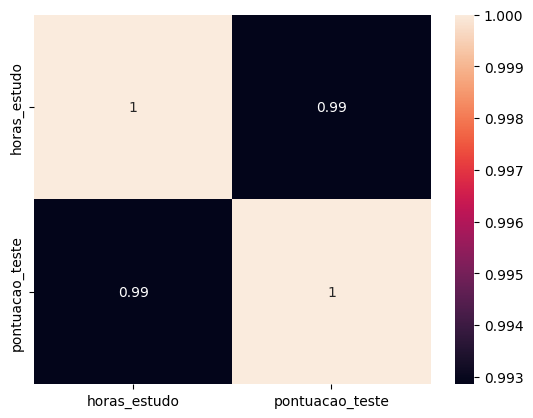

In [10]:
# Correlação - Pearson
sns.heatmap(df_pontuacao.corr('pearson'), annot= True)

<Axes: >

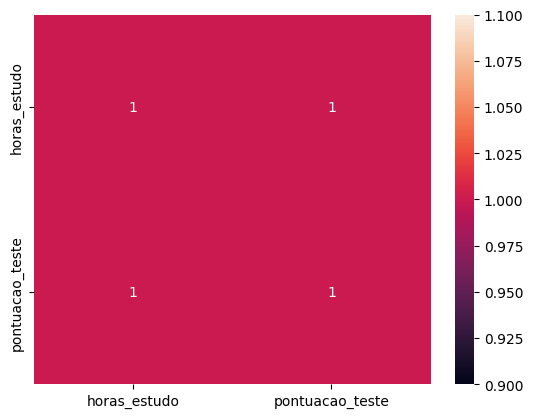

In [11]:
sns.heatmap(df_pontuacao.corr('spearman'), annot= True)

<Axes: xlabel='horas_estudo', ylabel='Count'>

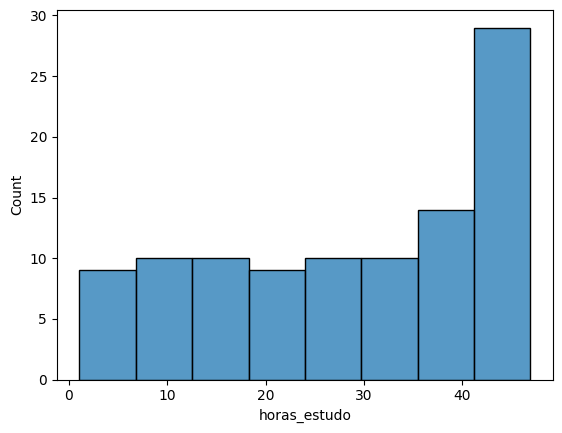

In [12]:
# Histograma
sns.histplot(df_pontuacao['horas_estudo'])

<Axes: xlabel='pontuacao_teste', ylabel='Count'>

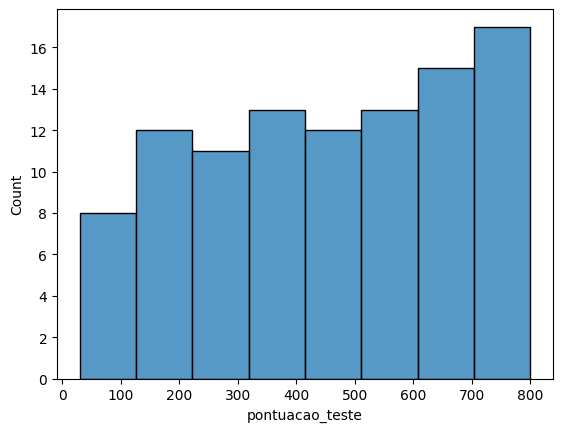

In [13]:
sns.histplot(df_pontuacao['pontuacao_teste'])

## Treinamento do Modelo

In [14]:
# Dividir dataset entre treino e teste
# Quando temos apenas uma feature, precisamos ajusta o shape

X = df_pontuacao['horas_estudo'].values.reshape(-1, 1) # variável independente
y = df_pontuacao['pontuacao_teste'].values.reshape(-1, 1) 
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.30, random_state=50)

In [15]:
# Instanciar o modelo
reg_modelo = LinearRegression()

In [16]:
reg_modelo.fit(X_treino, y_treino)

LinearRegression()

In [17]:
# Equação da reta: y = aX + b
print("A equação da reta é y = {:4f}x + {:4f}".format(reg_modelo.coef_[0][0], reg_modelo.intercept_[0]))

A equação da reta é y = 15.642619x + 8.476601


### Validar Modelo - Métricas

In [18]:
# Predição dos valores com base no conjunto de testes

y_pred = reg_modelo.predict(X_teste)

In [19]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error
from math import sqrt

r2_score(y_teste, y_pred)

0.9828400452912442

In [20]:
# Calcular métrica MAE (Mean Absolute Error)

mean_absolute_error(y_teste, y_pred)

np.float64(22.957470277134615)

In [21]:
# Calcular métrica MSE (Mean Squared Error)

mean_squared_error(y_teste, y_pred)

np.float64(766.9972992416427)

In [22]:
rms = sqrt(mean_squared_error(y_teste, y_pred))

print(rms)

27.69471608884342


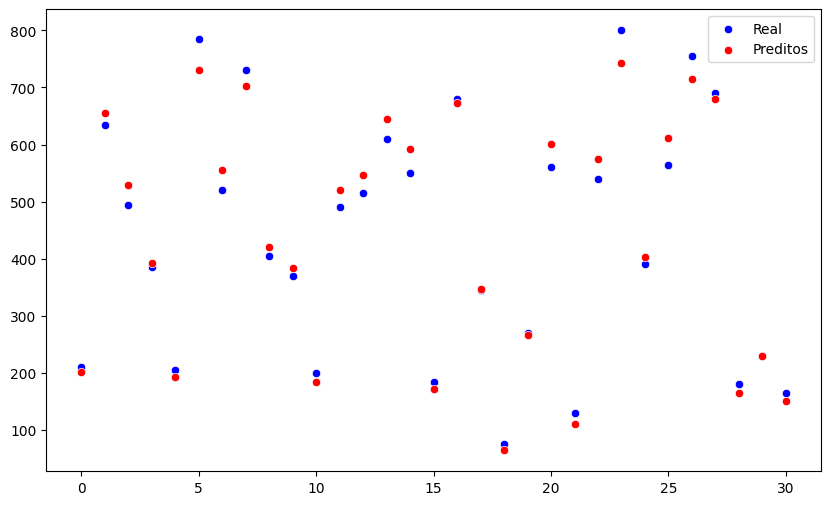

In [23]:
x_axis = range(len(y_teste))
plt.figure(figsize=(10, 6))

sns.scatterplot(x=x_axis, y=y_teste.reshape(-1), color='blue', label='Real')

sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Preditos')

plt.legend()
plt.show()

### Análise de Resíduos

In [24]:
residuos = y_teste - y_pred

In [25]:
# Calcular os resíduos padronizados (standardization)
# Para cada elemento de um conjunto (X - media) / desvio_padrao
from scipy.stats import zscore
residuos_std = zscore(residuos)

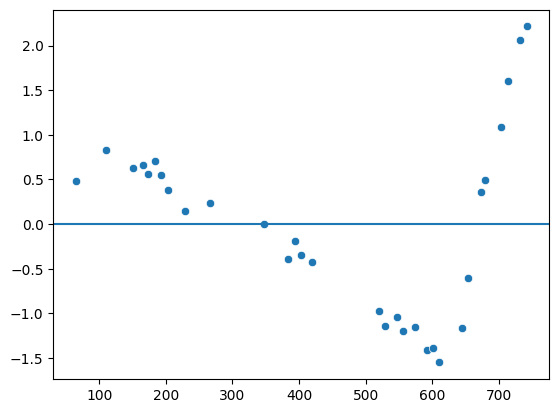

In [26]:
# Verificar linearidade do modelo:
# Se os resíduos estiverem entre -2 e +2 -> Linear
sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0)

Text(0, 0.5, 'Residuos na escala padrão')

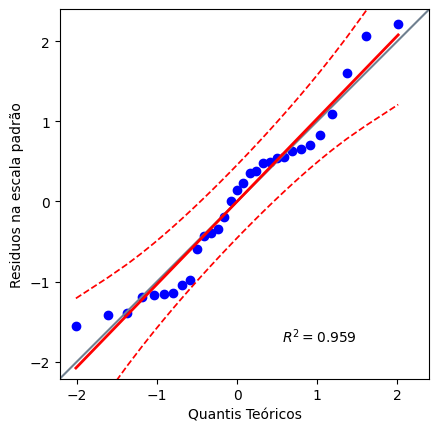

In [27]:
# Checar se residuos seguem uma distribuição normal
# Q (Quantile-Quantile) Plot, que avalia de uma amostra segue uma distribuição normal
import pingouin as pg
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Residuos na escala padrão')

In [28]:
# Teste de Normalidade - Shapiro Wilk
# H0 - Segue distribuição normal
# H1 - Não segue distribuição normal
# Se o p-valor > 0.05 não rejeita H0, caso contrário rejeitamos
shat_shapiro, p_valor_shapiro = shapiro(residuos.reshape(-1))
print("Estatística do teste: {} e P-Valor: {}".format(shat_shapiro, p_valor_shapiro))

Estatística do teste: 0.9500532226161759 e P-Valor: 0.15663817850304973


In [31]:
# Teste de Normalidade - Kolmogorov-Smirnov
# H0 - Segue distribuição normal
# H1 - Não segue distribuição normal
# Se o p-valor > 0.05 não rejeita H0, caso contrário rejeitamos
shat_ks, p_valor_ks = kstest(residuos.reshape(-1), 'norm')
print("Estatística do teste: {} e P-Valor: {}".format(shat_ks, p_valor_ks))

Estatística do teste: 0.48355808450512827 e P-Valor: 3.395368995814077e-07


### Predições com o modelo

In [33]:
# Se eu estudar 30.4 horas, qual a pontuação prevista pelo modelo?
reg_modelo.predict([[30.4]])

array([[484.01220436]])

In [35]:
# Quantas horas estudar para obter 600 pontos (pelo modelo)?
# Equação da reta -> y = ax + b
# y - b = ax
# (y - b) / a = x
# x = (y - b) / a
(600 - reg_modelo.intercept_[0]) / reg_modelo.coef_[0][0]

np.float64(37.81485802710669)

### Salvar modelo para usar depois

In [36]:
import joblib

joblib.dump(reg_modelo, 'modelo_pontuacao.pkl')

['modelo_pontuacao.pkl']